In [4]:
# Populating the interactive namespace from pandas, numpy, matplotlib and scipy
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
# Defining initial and central points of magnitude increments, compliteness times and periods of observation
# of each increment
M = [3.8, 4.3, 4.8, 5.3, 5.8, 6.3, 6.8, 7.3, 7.8]
cent_M = np.array([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])
comp_times = np.array([1969, 1967, 1959, 1929, 1909, 1893, 1595, 1500, 1300])
duration = 2006 - comp_times + 1

In [5]:
# Reading complete declustered earthquake catalog
declustered_complete = pd.read_table('earthquakes/declustered_complete.csv', sep = ',', na_values = ' ')

In [10]:
# Calculating number of earthquakes in each magnitude increment
N = np.zeros(len(M))
for i in range(len(cent_M)):
    N[i] = len(declustered_complete[(declustered_complete['Mw '] > (3.75 + i*0.5)) 
                                    & (declustered_complete['Mw '] < (4.25 + i*0.5))])

In [15]:
# estimation of beta by maximum likelihood (by Newton's method, beta = beta - f/df)
beta = 1.5 # initial estimation of beta

while True:
    snm = np.sum(N*cent_M)
    ncount = np.sum(N)
    stmex = np.sum(duration*cent_M*np.exp(-beta*cent_M))
    sumtex = np.sum(duration*np.exp(-beta*cent_M))
    stm2x = np.sum(duration*cent_M*cent_M*np.exp(-beta*cent_M))
    sumexp = np.sum(np.exp(-beta*cent_M))
    dldb = stmex/sumtex
    d2ldb2 = ncount*(dldb**2 - stm2x/sumtex)
    dldb = dldb*ncount - snm
    betl = beta
    beta = beta - dldb/d2ldb2
    if np.abs(beta - betl)<0.0001:
        break

stdv = np.sqrt(-1/d2ldb2) # standard deviation of beta
b = beta/np.log(10)
stdb = stdv/np.log(10) # standard deviation of b
fngtmo = ncount*sumexp/sumtex
fn5 = fngtmo*np.exp(-beta*(5 - (cent_M[0] - 0.25))) # annual rate of earthquakes with magnitude M >= 5
fn0 = fngtmo*np.exp(beta*(cent_M[0] - 0.25)) # annual rate of all the earthquakes
stdvfn5 = fn5/np.sqrt(ncount) # standard deviation of annual rate of earthquakes with magnitude M >= 5

In [88]:
b

0.65829053208753885

In [53]:
# calculation of annual earthquakes rates for the relevant magnitude span based on
# Weichert (maximum likelihood, Gutenberg-Richter)
mn = np.min(M) - 0.1
mx = 8.5
x2 = np.linspace(mn,mx,500)
weichert_predicted_rate = fngtmo*np.exp(-beta*(x2 - (cent_M[0] - 0.25)))

In [28]:
# calculation of cumulative annual earthquake rates based on the complete declustered earthquake catalogue 
N_normalized = N/duration # calculation of annual earthquake rate for each magnitude increment
N_norm_cum = np.zeros(len(N_normalized))
N_norm_cum[8] = N_normalized[8]
for i in range(len(N_norm_cum)-1):
    N_norm_cum[7-i] = N_normalized[7-i] + N_norm_cum[8-i]

In [85]:
10**(gradient1*5 + intercept1)

4.4216284759333675

In [54]:
# calculation of the linear fit statistics for log of cumulative annual earthquake rates
# vs magnitude (Gutenberg-Richter)
gradient1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(M,np.log10(N_norm_cum))
y2=gradient1*x2+intercept1

In [35]:
# goodness of fit R^2
r_value1**2

0.97928598094873498

In [69]:
# calculation of annual earthquakes rates for the relevant magnitude span based on
# Grunthal (maximum likelihood, truncated Gutenberg-Richter)
fn375 = fngtmo*np.exp(-beta*(3.75 - (cent_M[0] - 0.25)))
grunthal_predicted_rate = fn375*(1 - (1 - np.exp(-beta*(x2 - cent_M[0] + 0.25)))/
                               (1 - np.exp(-beta*(8.5 - cent_M[0] + 0.25))))

/Users/sharon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


Text(0,0.5,'log(cumulative annual rate)')

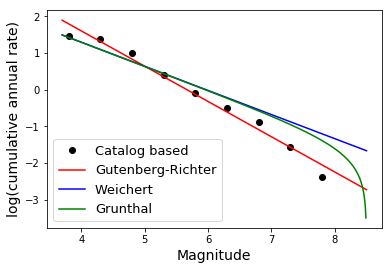

In [75]:
# plotting the logarithm of the annual earthquake rates calculated from the catalog 
# and predicted by Gutenberg-Richter relation, by Weichert method and by Grunthal method (truncated Gutenberg-Richter)
plt.plot(M,np.log10(N_norm_cum), 'ko', label = 'Catalog based') # catalog based
plt.plot(x2,y2,'-r', label = 'Gutenberg-Richter') # Gutenberg-Richter
plt.plot(x2,np.log10(weichert_predicted_rate), 'b', label = 'Weichert') # Weichert
plt.plot(x2,np.log10(grunthal_predicted_rate), 'g', label = 'Grunthal') # Grunthal
plt.legend(fontsize=13)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('log(cumulative annual rate)', fontsize=14, rotation=90)

Text(0,0.5,'Annual rate')

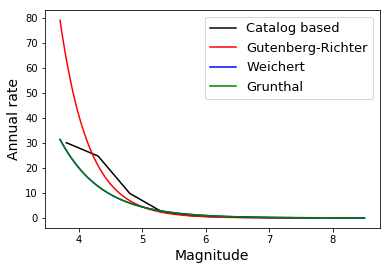

In [74]:
# plotting the annual earthquake rates calculated from the catalog and predicted by 
# Gutenberg-Richter relation, by Weichert method and by Grunthal method (truncated Gutenberg-Richter)
plt.plot(M,N_norm_cum, 'k', label = 'Catalog based')
plt.plot(x2,10**y2,'-r', label = 'Gutenberg-Richter')
plt.plot(x2,weichert_predicted_rate, 'b', label = 'Weichert')
plt.plot(x2,grunthal_predicted_rate, 'g', label = 'Grunthal')
plt.legend(fontsize=13)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Annual rate', fontsize=14, rotation=90)

Text(0,0.5,'Annual rate')

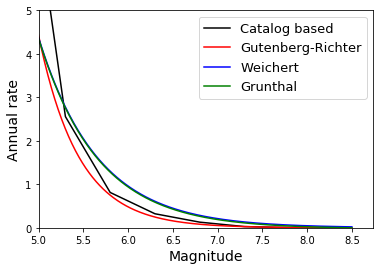

In [73]:
# The same plot as above zoomed in at M >= 5
plt.plot(M,N_norm_cum, 'k', label = 'Catalog based')
plt.plot(x2,10**y2,'-r', label = 'Gutenberg-Richter')
plt.plot(x2,weichert_predicted_rate, 'b', label = 'Weichert')
plt.plot(x2,grunthal_predicted_rate, 'g', label = 'Grunthal')
plt.ylim(ymin = 0, ymax = 5)
plt.xlim(xmin = 5)
plt.legend(fontsize=13)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Annual rate', fontsize=14, rotation=90)

Text(0,0.5,'Annual rate')

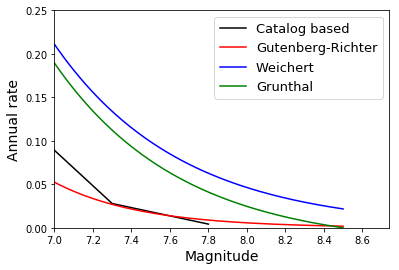

In [87]:
# The same plot as above zoomed in at M >= 7
plt.plot(M,N_norm_cum, 'k', label = 'Catalog based')
plt.plot(x2,10**y2,'-r', label = 'Gutenberg-Richter')
plt.plot(x2,weichert_predicted_rate, 'b', label = 'Weichert')
plt.plot(x2,grunthal_predicted_rate, 'g', label = 'Grunthal')
plt.ylim(ymin = 0, ymax = 0.25)
plt.xlim(xmin = 7)
plt.legend(fontsize=13)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Annual rate', fontsize=14, rotation=90)